# **CAR PRICE PREDICTION**
*Predicting the Price of Used Cars*

>This analysis and model will be used to find correlation between Various Features/Specs and Car Price price aswell as being used to predict Car prices in the future.

###**Step1.1:** Importing Libraries and Loading DataSet

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np # linear Algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline
from scipy import stats

In [4]:
df=pd.read_csv("/content/drive/MyDrive/DATA science Task and Projects/Wine Quality Data Set analysis/Projects/Dinesh Suthar - Car details v3.csv")

###**Step1.2** "Reading and Understanding the Data"

In [5]:
#reading data 
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [6]:
#shape of data i.e rows and columns 
df.shape

(8128, 13)

In [7]:
#Columns present in the DataSet
print(*df.columns,sep='\n')

name
year
selling_price
km_driven
fuel
seller_type
transmission
owner
mileage
engine
max_power
torque
seats


In [8]:
df.info()

#it will give Totla No of Columns and their non null count with data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [9]:
#checking for null valuesd 
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [10]:
#checking for duplicates

df[df.duplicated(keep='first')].value_counts().sum()

1189

In [11]:
#dropping the duplicates
df.drop_duplicates(inplace= True)

In [12]:
df.shape 
#df shape after removing duplicates

(6926, 13)

In [13]:
#null values counts after dropping duplicates
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          208
engine           208
max_power        205
torque           209
seats            208
dtype: int64

In [14]:
#Viewing unique label in each column
for i in df.columns:
    print(i)
    print (df[i].unique())
    print("\n\n")

name
['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']



year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2003 2019 2008 2020 1999 2000 1983 2004 1996 1994 1995 1998 1997
 1991]



selling_price
[  450000   370000   158000   225000   130000   440000    96000    45000
   350000   200000   500000    92000   280000   180000   400000   778000
   150000   680000   174000   950000   525000   600000   575000   275000
   300000   220000   254999   670000    70000   730000   650000   330000
   366000  1149000   425000  2100000   925000   675000   819999   390000
  1500000   700000  1450000  1090000   850000  1650000  1750000  1590000
  1689999  1425000   265000   190000   630000   540000   448000   745000
  1025000   235000  1700000    50000  1200000   610000  2500000   484999
   315000   475000   29000

> From Above we see the unique values of each columns. Some columns are numericals and some are categorical. "mileage","max_power" And "engine" Colums can be processed to convert it into numerical. Also "name" And "torque" Are very noisy columns.
Lets see further what and how can we process and clean the Columns in dataframes.

###**Step 2:** EDA or Data Analysis

#### Null Value Handling

In [15]:
null_perc = pd.DataFrame(round((df.isnull().sum()/df.shape[0])*100,2)).reset_index()
null_perc.columns = ['Variable','%Missing_Value']
null_perc

,Variable,%Missing_Value
0,name,0.00
1,year,0.00
2,selling_price,0.00
3,km_driven,0.00
4,fuel,0.00
5,seller_type,0.00
6,transmission,0.00
7,owner,0.00
8,mileage,3.00
9,engine,3.00


In [16]:
# as percent of null values is less than 5% of data, we canndrop null values

df.dropna(axis=0,inplace=True)

In [17]:
df.shape

(6717, 13)

* Null Values can be replaced by Measure of Central Tendency if needed.(Code are comment in column cleaning section)

####**Step 2.1:** Column Cleaning and Handling Null (NaN) Values

In [18]:

# Get the position of categorical columns
catColumnsPos = [df.columns.get_loc(col) for col in list(df.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(df.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['name', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque']
Categorical columns position  : [0, 4, 5, 6, 7, 8, 9, 10, 11]


######*Examing **"torque"** Column*

* Column is noisy and have large numbers of unique values, so drop this

In [19]:
#torque column
df = df.drop(labels='torque', axis=1)

######*Examing **"name"** Column.*

* In Car "name" column There are many unique name. 
That's something really hard to implement and a regression that would mean more  dummies, so we simply drop this column.

In [20]:
#name column
df['name'].nunique()

1982

In [21]:
# In Car Name column There are many unique name. 
# That's something really hard to implement and a regression that would mean more  dummies, so we simply drop this column
df = df.drop(labels='name', axis=1)

######*Feature Extraction of **"km_driven"** column*

In [22]:
#km_driven column has values in high range so convert it  km in lac i.e 2.3lac km will mean 2,30,000 km.
#just for better visualization 
#divide by lak to make this "km_driven in lakh"
df['km_driven_lac']=df['km_driven']/100000


#drop the km_driven column after the needed info is derived.
df.drop(labels='km_driven',axis=1,inplace=True)

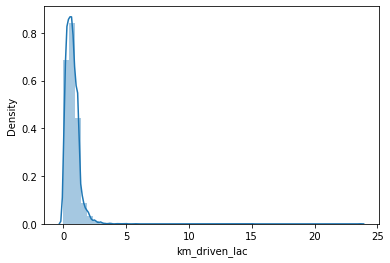

In [23]:
sns.distplot(df["km_driven_lac"])

######*Feautre Extraction of **"year"** Column*

* Creating a new feature **"car_age"** calledtotal no. of years old my car,bcz It's important to know how many years

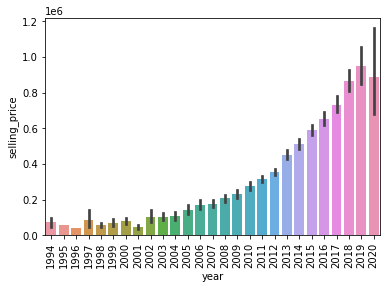

In [24]:
sns.barplot(x=df['year'],y=df['selling_price'])
plt.xticks(rotation='vertical')
plt.show()

In [25]:
#year column

# Creating a new feature called total no. of years old  car,bcz It's important to know how many years old the car is.
df['car_age'] = 2022-df['year']

#It's time to drop the Year column after the needed info is derived.
df.drop(labels='year',axis=1,inplace=True)

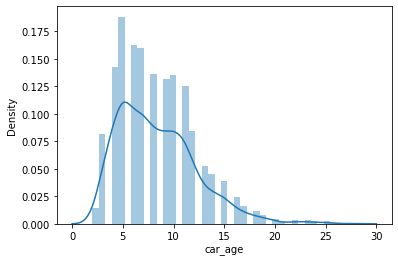

In [26]:
sns.distplot(df["car_age"])
plt.show()

######*Processing **"mileage"** column and Handling NaN*

In [27]:
#mileage Column
 
#removing kmpl and km/kg
df['mileage'] = df['mileage'].str.replace("kmpl", "")

df['mileage'] = df['mileage'].str.replace("km/kg", "")


#float to int

df['mileage'] = df['mileage'].astype('float')

In [28]:
#there are null values in "mileage" column
df['mileage'].isnull().sum()

0

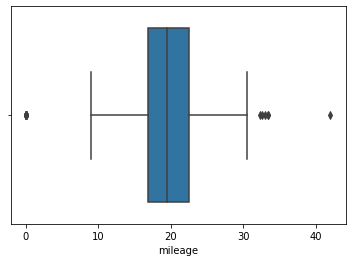

In [29]:
#distribution of values 
sns.boxplot(df['mileage'])
plt.show()

* There are no NaN values but boxplot show there are some Zero value, Zero Mileage does not make sense so lets removes them or replace but we will remove

In [30]:

df = df[df['mileage'] > 0]
df=df[df['mileage']<40]
df.shape

(6701, 11)

In [31]:
print("Meidan",df['mileage'].median())
print("Mean",df['mileage'].mean())
print("Mode",df['mileage'].mode())

Meidan 19.49
Mean 19.506797492911506
Mode 0    18.9
dtype: float64


In [32]:
#replacing nan values
#df['mileage'].fillna(value=df['mileage'].mean(), inplace=True)

In [33]:
#again checking for null counts
#df['mileage'].isnull().sum()

######*Processing **"engine"** column and Handling NaN*

In [34]:

#removing CC
df['engine'] = df['engine'].str.replace("CC", "")


#object to int

df['engine'] = df['engine'].astype('float')

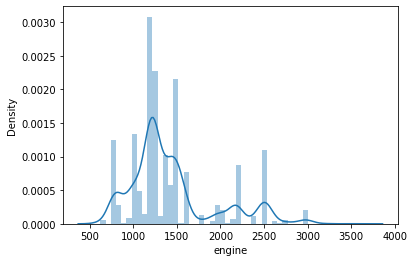

In [35]:
sns.distplot(df['engine'])
plt.show()

In [36]:
#checking null counts
df['engine'].isnull().sum()

0

In [37]:
#replacing null values
#df['engine'].fillna(value=df['engine'].mean(), inplace=True)

In [38]:
#cross checking 
#df['engine'].isnull().sum()

In [39]:
#sns.distplot(df["engine"])
#plt.show()

######*Processing **"max_power"** column and Handling NaN*

In [40]:
#analyzing uniques values
df['max_power'].unique()

array(['74 bhp', '103.52 bhp', '78 bhp', '90 bhp', '88.2 bhp',
       '81.86 bhp', '57.5 bhp', '37 bhp', '67.1 bhp', '68.1 bhp',
       '108.45 bhp', '60 bhp', '73.9 bhp', '67 bhp', '82 bhp', '88.5 bhp',
       '46.3 bhp', '88.73 bhp', '64.1 bhp', '98.6 bhp', '88.8 bhp',
       '83.81 bhp', '83.1 bhp', '47.3 bhp', '73.8 bhp', '34.2 bhp',
       '35 bhp', '81.83 bhp', '40.3 bhp', '121.3 bhp', '138.03 bhp',
       '160.77 bhp', '117.3 bhp', '116.3 bhp', '83.14 bhp', '67.05 bhp',
       '168.5 bhp', '100 bhp', '120.7 bhp', '98.63 bhp', '175.56 bhp',
       '103.25 bhp', '171.5 bhp', '100.6 bhp', '174.33 bhp', '187.74 bhp',
       '170 bhp', '78.9 bhp', '88.76 bhp', '86.8 bhp', '108.495 bhp',
       '108.62 bhp', '93.7 bhp', '103.6 bhp', '98.59 bhp', '189 bhp',
       '67.04 bhp', '68.05 bhp', '58.2 bhp', '82.85 bhp', '81.80 bhp',
       '73 bhp', '120 bhp', '94.68 bhp', '160 bhp', '65 bhp', '155 bhp',
       '69.01 bhp', '126.32 bhp', '138.1 bhp', '83.8 bhp', '126.2 bhp',
       '98.96 bh

In [41]:
#checking null counts
df['max_power'].isnull().sum()

0

In [42]:
#removing bhp

df['max_power'] = df['max_power'].str.replace("bhp", "")

In [43]:
#object to int
df['max_power']= pd.to_numeric(df['max_power'], errors='coerce')


#some errors are coming so when using 'coerce' errors will be replaced by NaN

In [44]:
df['max_power'].mean()

87.7190262647366

In [45]:
#now checking for null values after processing column
df['max_power'].isnull().sum()

0

In [46]:
#replacing Null Values.
df['max_power'].fillna(value=df['max_power'].mean(), inplace=True)

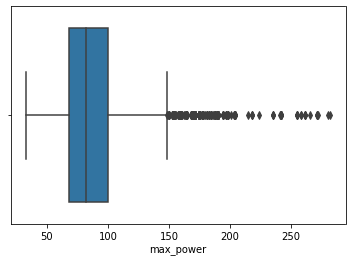

In [47]:
#boxplot for outlier
sns.boxplot(df['max_power'])

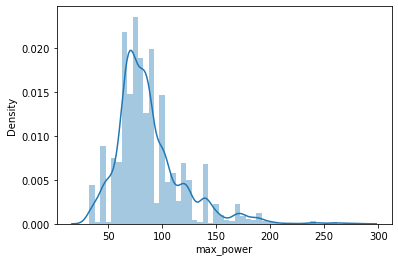

In [48]:
sns.distplot(df["max_power"])
plt.show()

######*Processing **"seats"** column and Handling NaN*

In [49]:
df['seats'].isnull().sum()

0

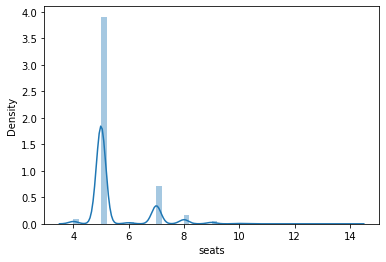

In [50]:
#distribution of column
sns.distplot(df['seats'])
plt.show()

In [51]:
#replacing nan vaules
#df["seats"].fillna(5, inplace= True)

In [52]:
df['seats'].unique()

array([ 5.,  4.,  7.,  8.,  6.,  9., 10., 14.])

#####*Feautre extraction of **"selling_price"** column*

In [53]:
df['selling_price_lac']=df['selling_price']/100000

In [54]:
df.drop(labels='selling_price',axis=1,inplace=True)

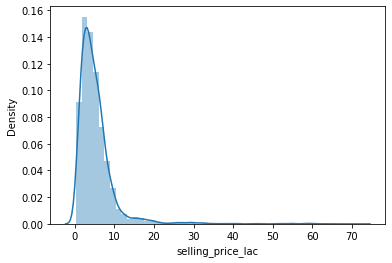

In [55]:
sns.distplot(df["selling_price_lac"])
plt.show()

####**Step 2.2:** Outlier Handling

In [56]:
#statistical summary
df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
mileage,6701.0,19.506797,3.937064,9.00000,16.80,19.49000,22.54,24.70,25.83,28.40,33.44000
engine,6701.0,1430.627220,493.009416,624.00000,1197.00,1248.00000,1498.00,2179.00,2499.00,2956.00,3604.00000
max_power,6701.0,87.719026,31.475026,32.80000,68.00,81.83000,100.00,126.32,147.90,190.00,282.00000
seats,6701.0,5.436353,0.982846,4.00000,5.00,5.00000,5.00,7.00,7.00,9.00,14.00000
km_driven_lac,6701.0,0.734336,0.587421,0.00001,0.38,0.68519,1.00,1.20,1.55,2.40,23.60457
car_age,6701.0,8.386659,3.897477,2.00000,5.00,8.00000,11.00,14.00,15.00,20.00,28.00000
selling_price_lac,6701.0,5.246091,5.095399,0.29999,2.50,4.20000,6.50,9.00,12.00,27.11,72.00000


In [57]:
df_col=['mileage','engine','max_power','seats',
'km_driven_lac' ,'car_age','selling_price_lac']

* Outliers may affect the accuracy of the model so its imp to study them and remove if needed
*We will define 3 functions, for defining outlier thresholds, checking for outlier and replacing them

In [58]:

#defining function that will take calculate the thresholds for each column
#this will take dataframe ,column names and q1 and q3 as attribute.

def outlier_thresholds(dataframe, col_name, q1, q3):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)

    #calculating interquantile range
    interquantile_range = quartile3 - quartile1

    #getting upper and lower limit 
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range

    return low_limit, up_limit

In [59]:
#this function will checking for the outliers in each column with the thresholds

def check_outlier(dataframe, col_name,q1,q3):
    #from above function taking upper and lower thresholds
    low_limit, up_limit = outlier_thresholds(dataframe, col_name,q1,q3)
    
    #iterating over column values and checking
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [60]:
#replacing the outliers with lower and upper limit

def replace_with_thresholds(dataframe, col_name,q1,q3):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name,q1,q3)
    dataframe.loc[(dataframe[col_name] < low_limit), col_name] = low_limit
    dataframe.loc[(dataframe[col_name] > up_limit), col_name] = up_limit

In [61]:
#creating a list with names of numerical columns
cols=['mileage','engine','max_power','car_age','km_driven_lac']

In [62]:
#checking for outlier  if any in numerical column in the given threshold range

for col in cols :
    print(col,check_outlier(df, col,q1=0.05,q3=0.95))

mileage False
engine False
max_power False
car_age False
km_driven_lac True


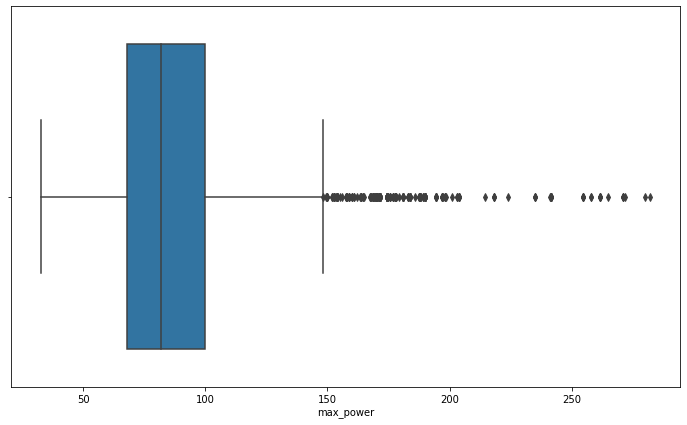

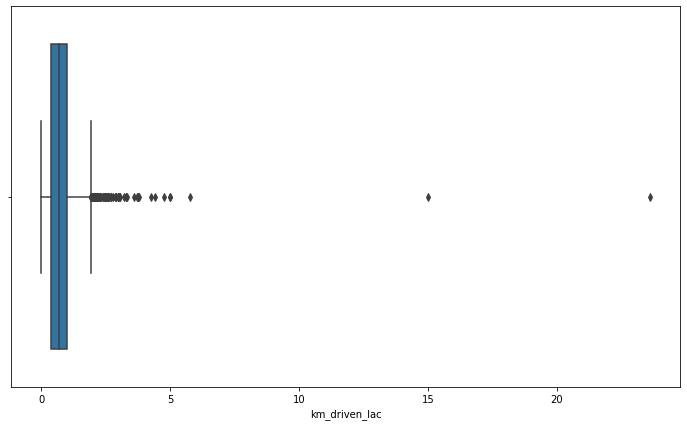

In [63]:
#visualizing columns with box plot

plt.figure(figsize=[12,7])
sns.boxplot(df['max_power'])
plt.show()


#plt.figure(figsize=[12,7])
#sns.boxplot(df['car_age'])
#plt.show()


plt.figure(figsize=[12,7])
sns.boxplot(df['km_driven_lac'])
plt.show()

* Here, we say there are many values lies as outliers so this is not a good idea to remove all, but we will only remove/replace which are very high from the rest of values

In [64]:
#replacing the outliers with thresholds

for col in cols:
    replace_with_thresholds(df,col,q1=0.05,q3=0.95)

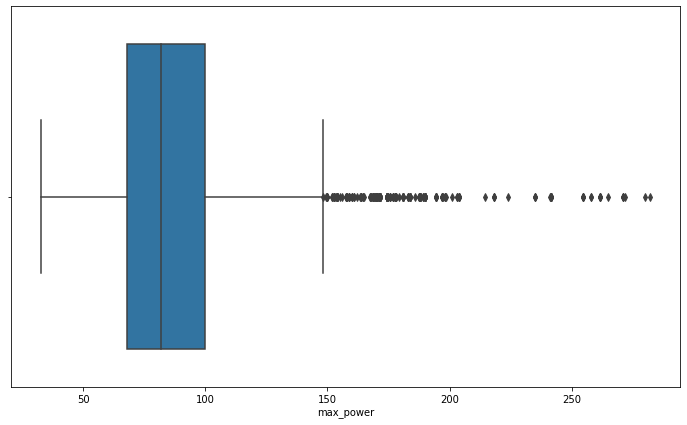

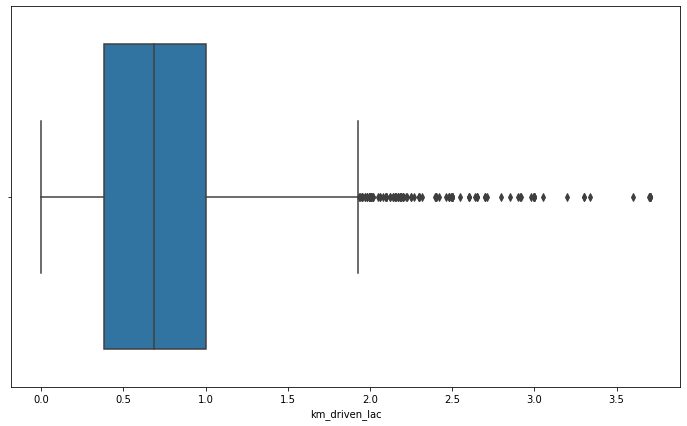

In [65]:
#visualzing outliers columns after removing/replacing them 
plt.figure(figsize=[12,7])
sns.boxplot(df['max_power'])
plt.show()


#plt.figure(figsize=[12,7])
#sns.boxplot(df['car_age'])
#plt.show()

plt.figure(figsize=[12,7])
sns.boxplot(df['km_driven_lac'])
plt.show()


#now this columns looks better than before and will contribute towards better accuracy of model

In [66]:
#again checking for outliers and as we have already removed so we have false for each column
for col in cols :
    print(col,check_outlier(df, col,q1=0.05,q3=0.95))

mileage False
engine False
max_power False
car_age False
km_driven_lac False


######*Outlier Handling in **"selling_price_lac"** Column*

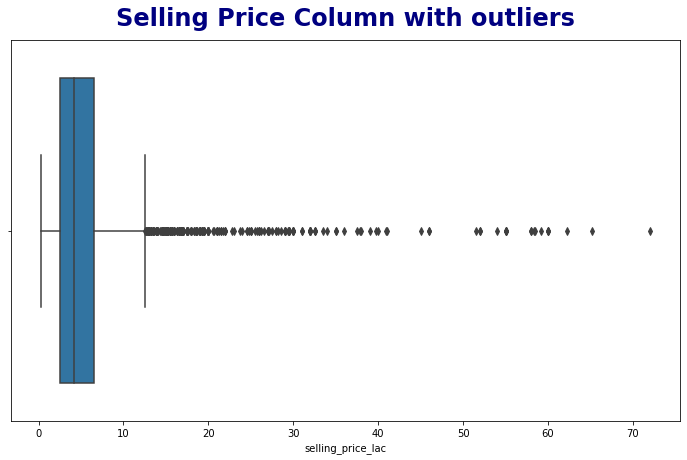

In [67]:
#box plot to check outliers
plt.figure(figsize=[12,7])
sns.boxplot(df['selling_price_lac'])
plt.title('Selling Price Column with outliers',fontsize=24,fontweight='bold',color='navy',pad=15);

This Column is our "Target" Column and values are imp for our model.
But there are few values which are high then the rest so we will remove/replace this but we will consider very small threshold for this.

In [68]:
Colns=["selling_price_lac"]

#checking for outliers
for i in Colns:
    print(i,check_outlier(df,i,q1=0.05,q3=0.95))

print("\n\n")

selling_price_lac True





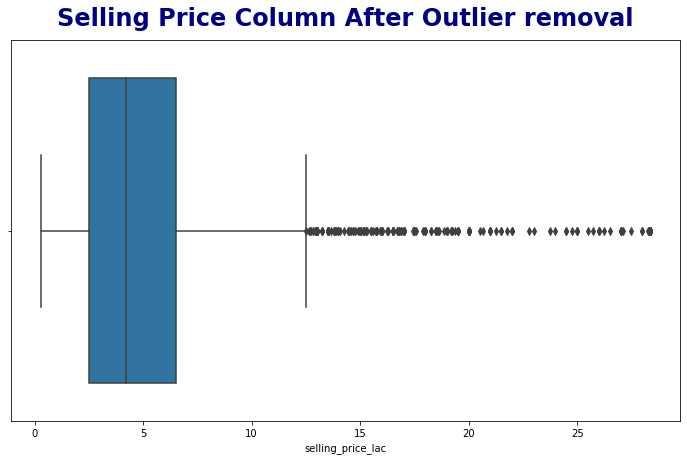

In [69]:
#replacing outliers with threshold and ploting 

for i in Colns:
    replace_with_thresholds(df,i,q1=0.05,q3=0.95)

print("\n\n")


#box plot of column after removing outliers
plt.figure(figsize=[12,7])
sns.boxplot(df['selling_price_lac'])
plt.title('Selling Price Column After Outlier removal',fontsize=24,fontweight='bold',color='navy',pad=15);

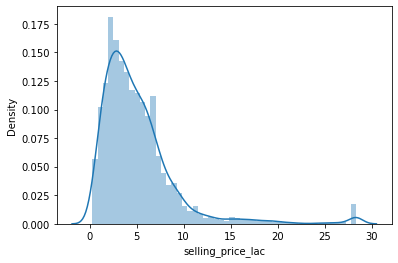

In [70]:
sns.distplot(df["selling_price_lac"])

######Outlier Removal in Seats Column

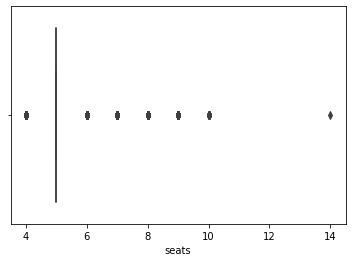

In [71]:
sns.boxplot(df["seats"])

In [72]:
df["seats"].value_counts()

5.0     5241
7.0      966
8.0      221
4.0      123
9.0       74
6.0       57
10.0      18
14.0       1
Name: seats, dtype: int64

10 seater and 14 seater cars are very few and 99% of car data is car with 9 seats.
So dropping this few rows

In [73]:
df=df[df["seats"]<10]
df.shape

(6682, 11)

In [74]:
#statistical summary after cleaning and processing all columns.
df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,mileage,engine,max_power,seats,km_driven_lac,car_age,selling_price_lac
count,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000,6682.000000
mean,19.524508,1428.016761,87.752992,5.422778,0.727210,8.377133,5.132988
std,3.928123,491.032569,31.509405,0.949452,0.479885,3.891309,4.197520
min,9.000000,624.000000,32.800000,4.000000,0.000010,2.000000,0.299990
25%,16.800000,1197.000000,67.100000,5.000000,0.378360,5.000000,2.500000
50%,19.500000,1248.000000,81.860000,5.000000,0.680000,8.000000,4.200000
75%,22.540000,1498.000000,100.000000,5.000000,1.000000,11.000000,6.500000
90%,24.800000,2179.000000,126.320000,7.000000,1.200000,14.000000,9.000000
95%,25.830000,2499.000000,147.900000,7.000000,1.550000,15.000000,12.000000
99%,28.400000,2956.000000,190.000000,9.000000,2.395553,20.000000,27.184100


###**Step 3:** Data Visualization

> In this step, we will analyze the relation between diff column by visualizing them. 
This will help to study and understand the relation between columns and how they are affecting or contributing to the selling price of the car

In [75]:
df.columns

Index(['fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine',
       'max_power', 'seats', 'km_driven_lac', 'car_age', 'selling_price_lac'],
      dtype='object')

<Figure size 2160x2160 with 0 Axes>

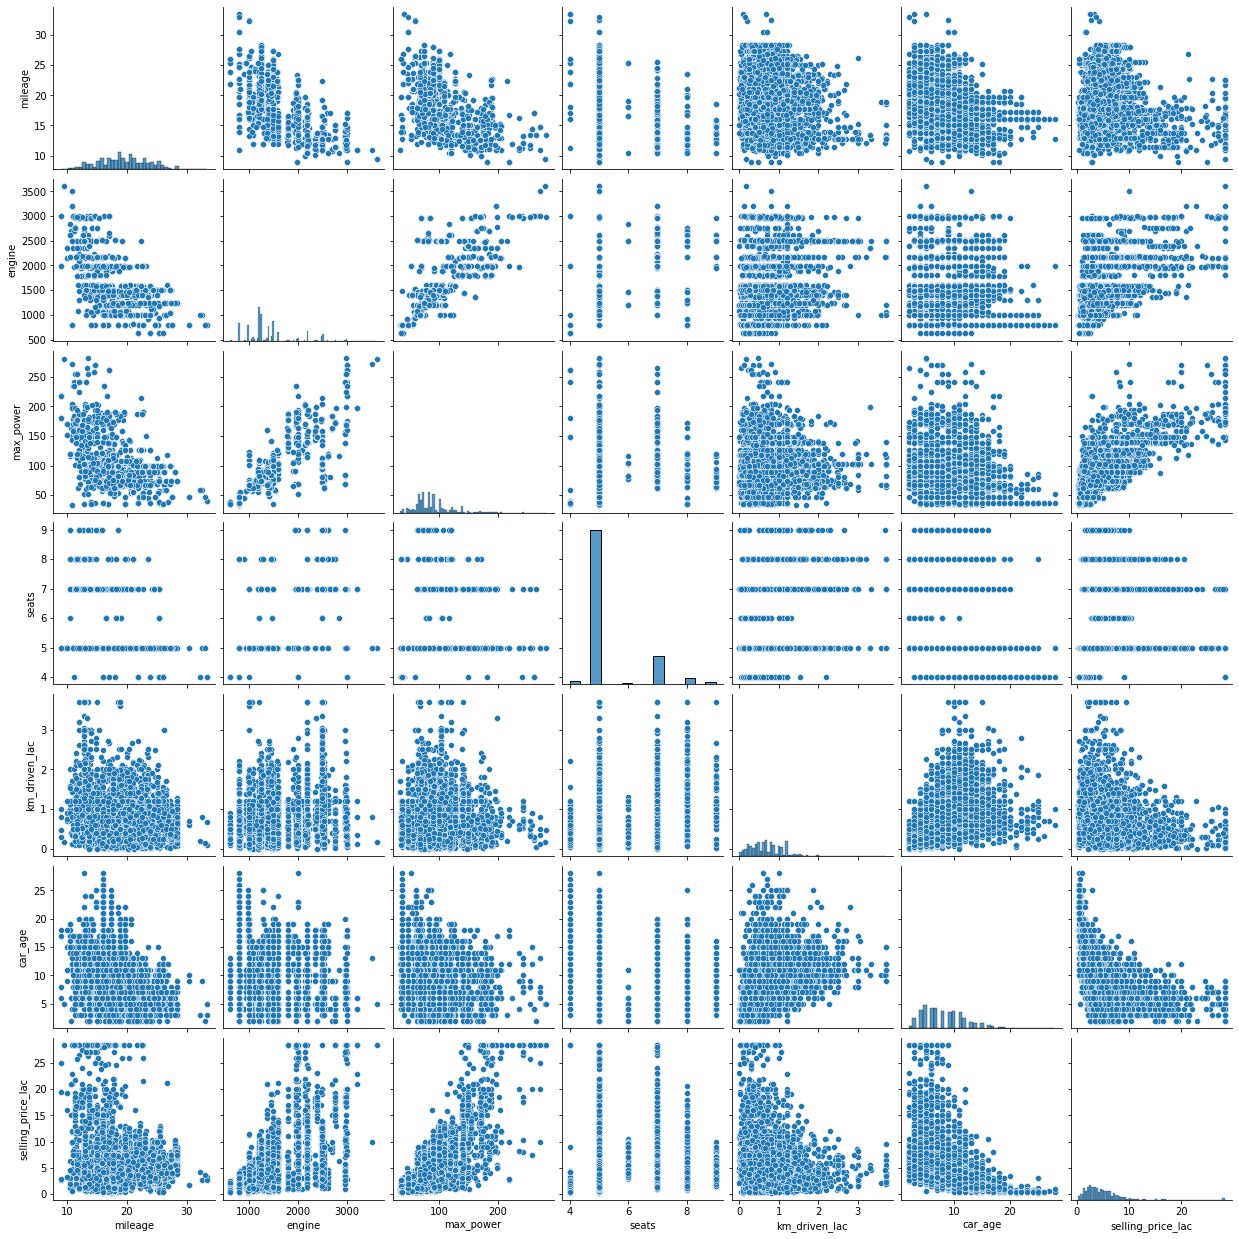

In [76]:
#this will plot only numerical cols
plt.figure(figsize=[30,30])
sns.pairplot(df)
plt.show()

#####**Step 3.1:** Visualizing **NUMERICAL** column

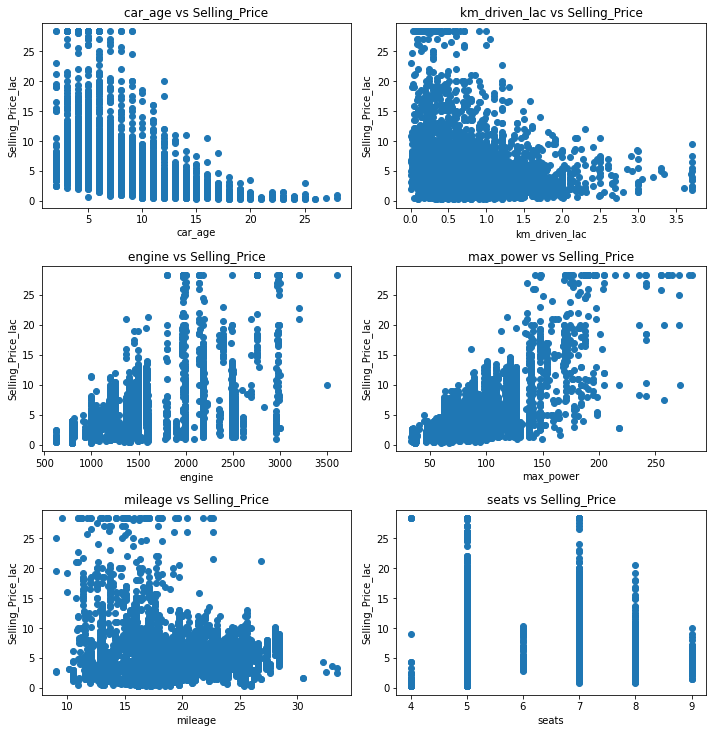

In [77]:
def scatter(x,fig):
    plt.subplot(6,2,fig)
    plt.scatter(df[x],df['selling_price_lac'])
    plt.title(x+' vs Selling_Price')
    plt.ylabel('Selling_Price_lac')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('car_age', 1)
scatter('km_driven_lac', 2)
scatter('engine', 3)
scatter('max_power', 4)
scatter('mileage', 5)
scatter('seats', 6)

plt.tight_layout()

###### *visualizing  **selling_price_lac** and **car_age** column*

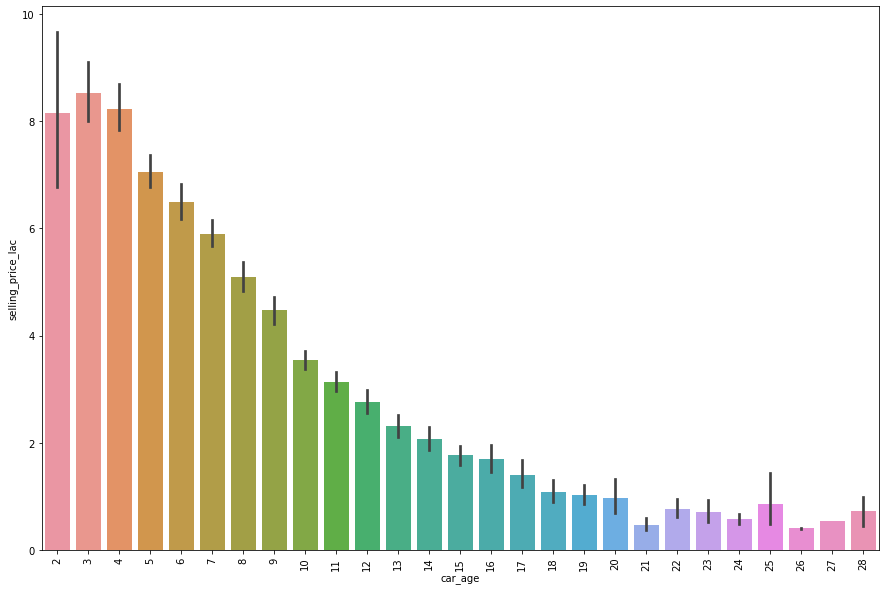

In [78]:
plt.figure(figsize = (15,10))
sns.barplot(x=df['car_age'],y=df['selling_price_lac'])
plt.xticks(rotation='vertical')
plt.show()

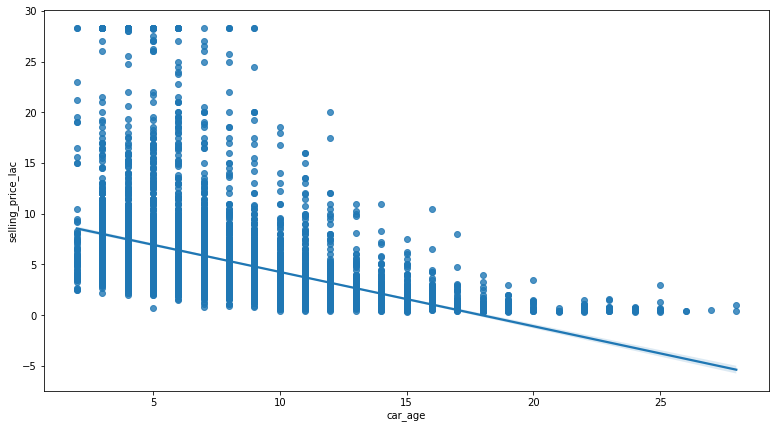

In [79]:
plt.figure(figsize = (13,7))

sns.regplot(x=df['car_age'],y=df['selling_price_lac'])
plt.show()

**Inference:**

* Selling Price of cars less old cars would be high and gradually decreases with the age of car. 
* there is negative correlation between both of this columns
* older the car, lower the selling price

###### *visualizing **selling_price_lac"** and **"km_driven_lac"** columns*

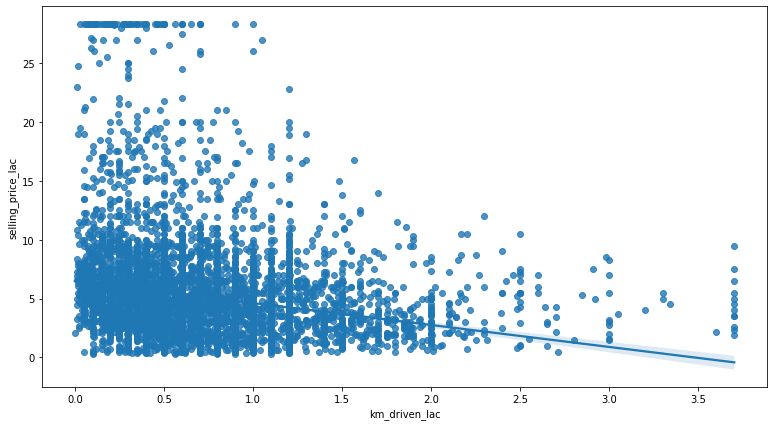

In [80]:
plt.figure(figsize = (13,7))
#sns.set(rc = {'figure.figsize':(15,8)})
sns.regplot(x=df['km_driven_lac'],y=df['selling_price_lac'])

* from above plot it is clear that higher the km_driven by the car, lower the selling price or 
* more used car is getting lower selling price than less used car

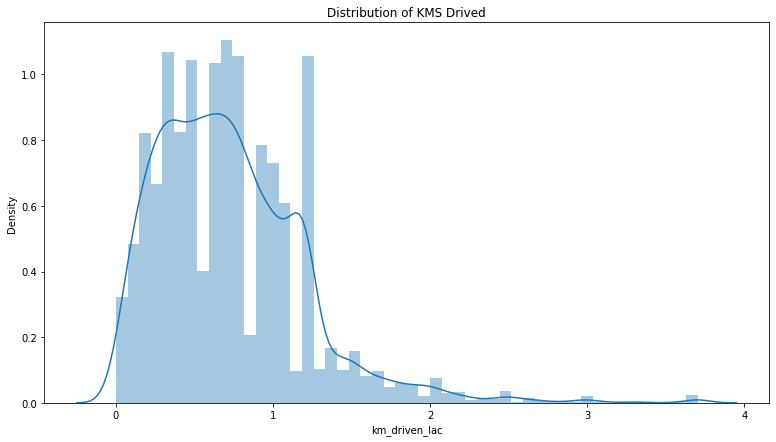

In [81]:
#distributon of values of km_driven_lac column
plt.figure(figsize=[13,7])
sns.distplot((df['km_driven_lac']))
plt.title('Distribution of KMS Drived')
plt.show()

###### *visualizing **selling_price_lac** and **mileage** column*

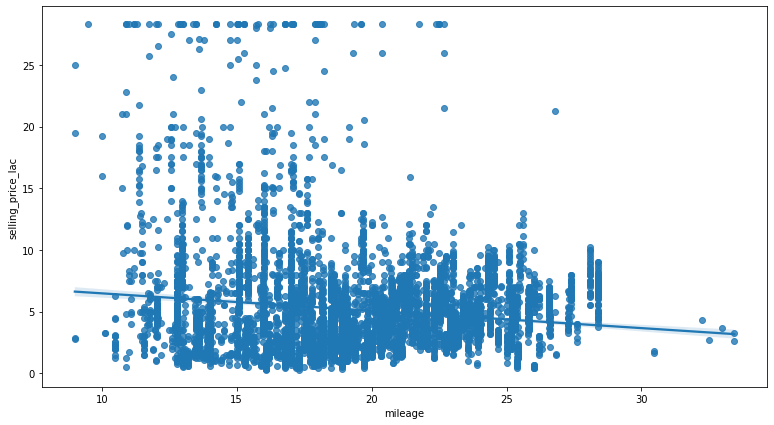

In [82]:
plt.figure(figsize = (13,7))

sns.regplot(x=df['mileage'],y=df['selling_price_lac'])
plt.show()

* selling price and mileage has negative correlation
* selling price is low as mileage increases

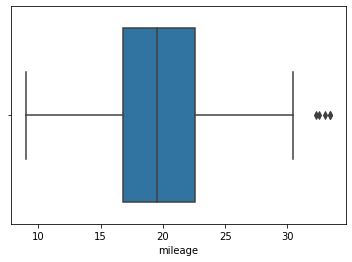

In [83]:
sns.boxplot(df['mileage'])
plt.show()

 ###### *visualizing **selling_price_lac** and **engine** column*

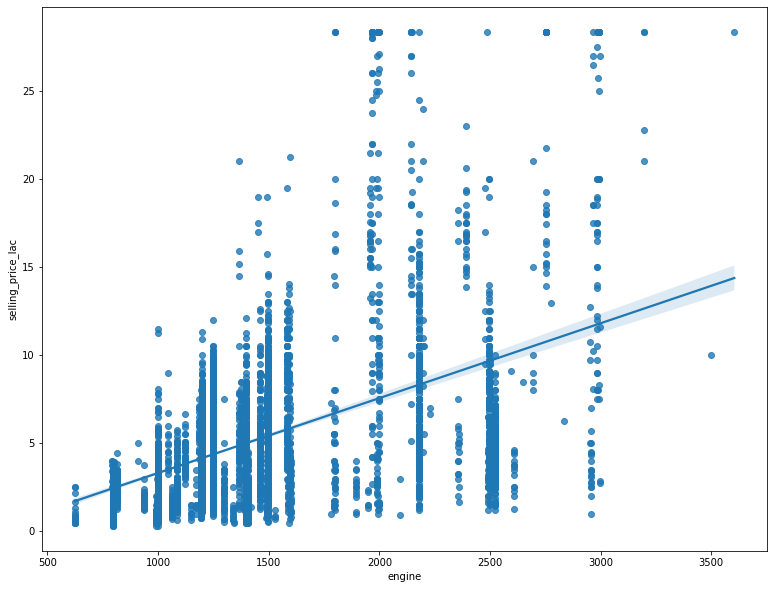

In [84]:
plt.figure(figsize = (13,10))

sns.regplot(x=df['engine'],y=df['selling_price_lac'])
plt.show()

* Better the Engine, Higher the selling Price

 ###### *visualizing **selling_price_lac** and **max_power** column*

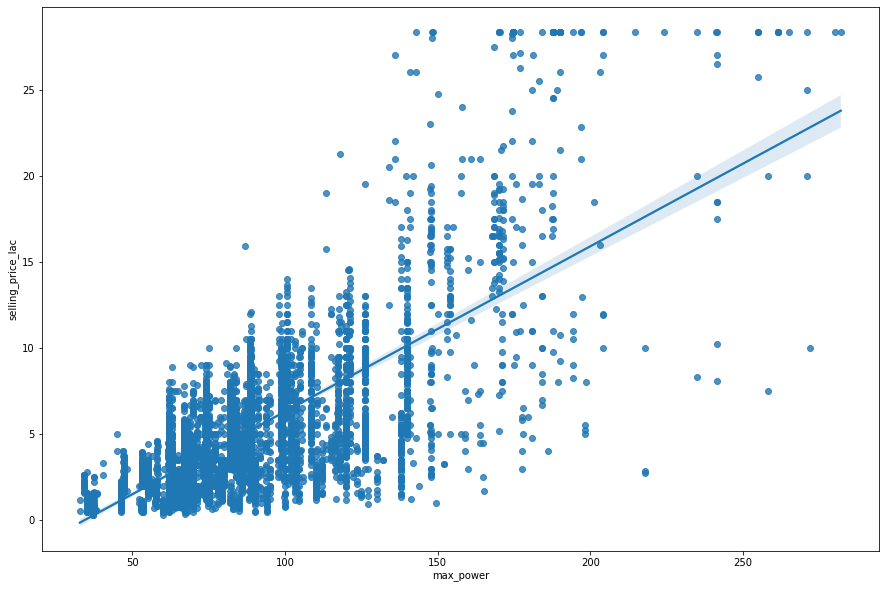

In [85]:
plt.figure(figsize = (15,10))

sns.regplot(x=df['max_power'],y=df['selling_price_lac'])
plt.show()

* selling price of car increases with the power of the car

###### *visualizing **selling_price_lac** and **seats** column*

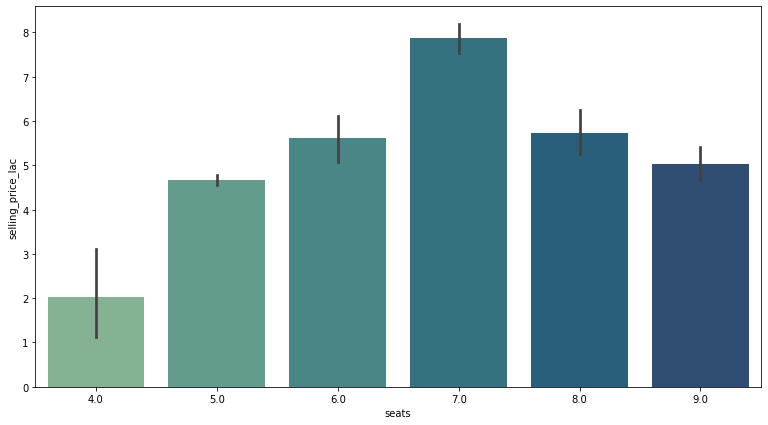

In [86]:
plt.figure(figsize = (13,7))

sns.barplot(x=df['seats'],y=df['selling_price_lac'],palette="crest")
plt.show()

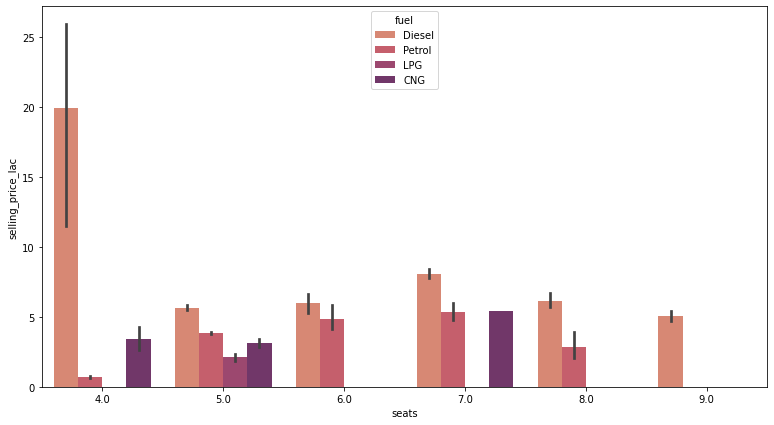

In [87]:
plt.figure(figsize = (13,7))

sns.barplot(x=df['seats'],y=df['selling_price_lac'],palette="flare", hue=df["fuel"])
plt.show()

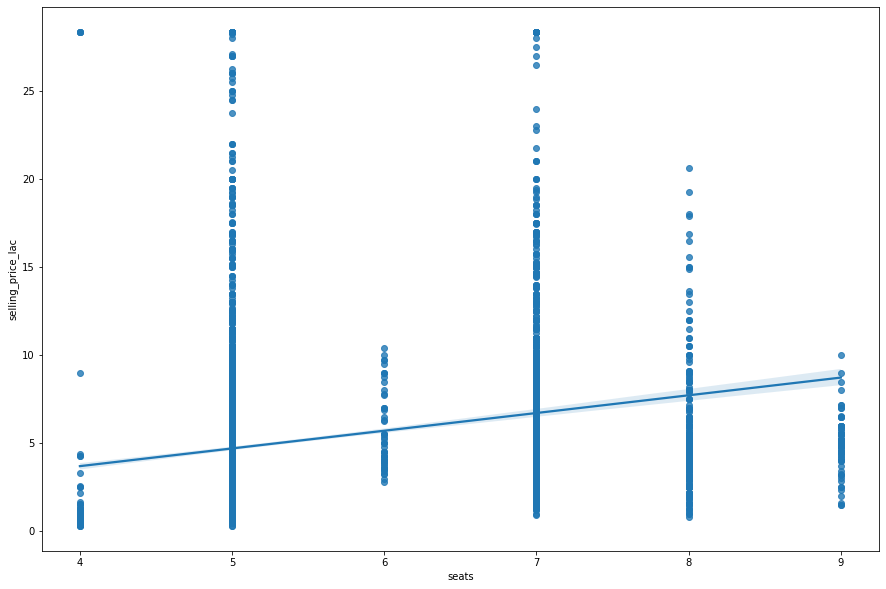

In [88]:
plt.figure(figsize = (15,10))

sns.regplot(x=df['seats'],y=df['selling_price_lac'])
plt.show()

**Inferences**
* 5-7 seater car has high selling price
* 4 seater Diesel Car has more selling price

##### **Step 3.2:** Visualizing **"CATEGORICAL"** column

 ###### *studying **selling price_lac** vs **fuel** colums*

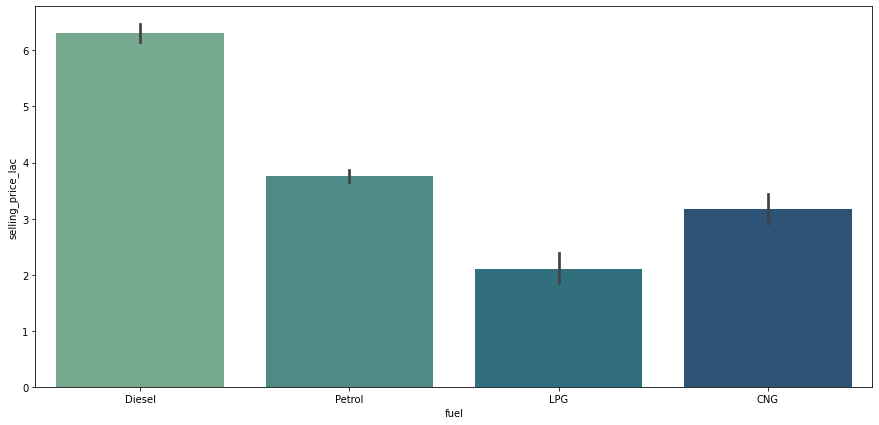

In [89]:
#bar plot to visualize
plt.figure(figsize = (15,7))
sns.barplot(x=df['fuel'],y=df['selling_price_lac'],
    palette="crest" )
plt.show()

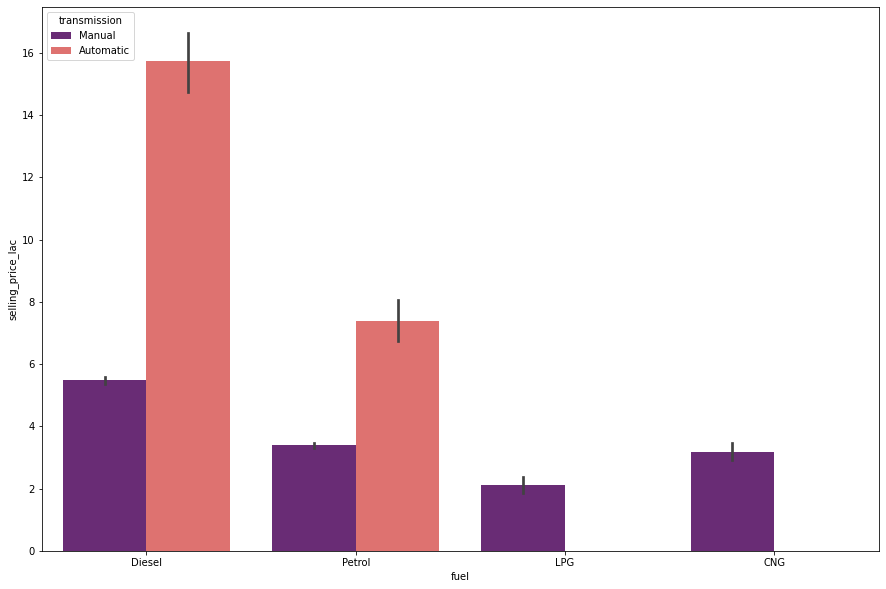

In [90]:
plt.figure(figsize = (15,10))
sns.barplot(x=df['fuel'],y=df['selling_price_lac'],hue=df['transmission'],palette="magma")
plt.show()



**Inference**
* Diesel Car has high selling price
* cars with LPG has lower selling price
* Selling Price of cars with Fuel Type of Diesel is higher than Petrol and CNG
* Automatic Diesel Car has high selling price

###### *visualize **selling price_lac** and **seller_type** columns*

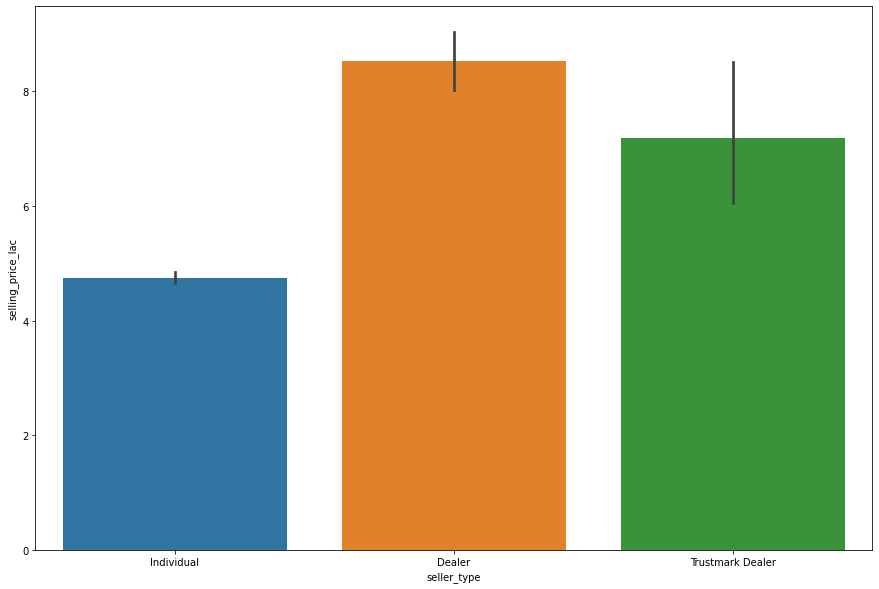

In [91]:
plt.figure(figsize = (15,10))
sns.barplot(x=df['seller_type'],y=df['selling_price_lac'])
plt.show()

* Selling Price of cars seems to have higher prices when sold by Dealers when compared to Individuals

###### *visualize **selling price_lac** and **transmission** col*

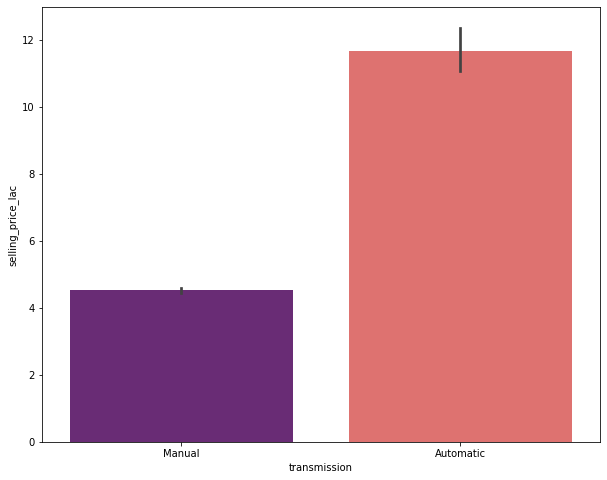

In [92]:
plt.figure(figsize = (10,8))
#sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x=df['transmission'],y=df['selling_price_lac'],palette="magma")
plt.show()

* Automic cars has high selling price then Manual Cars

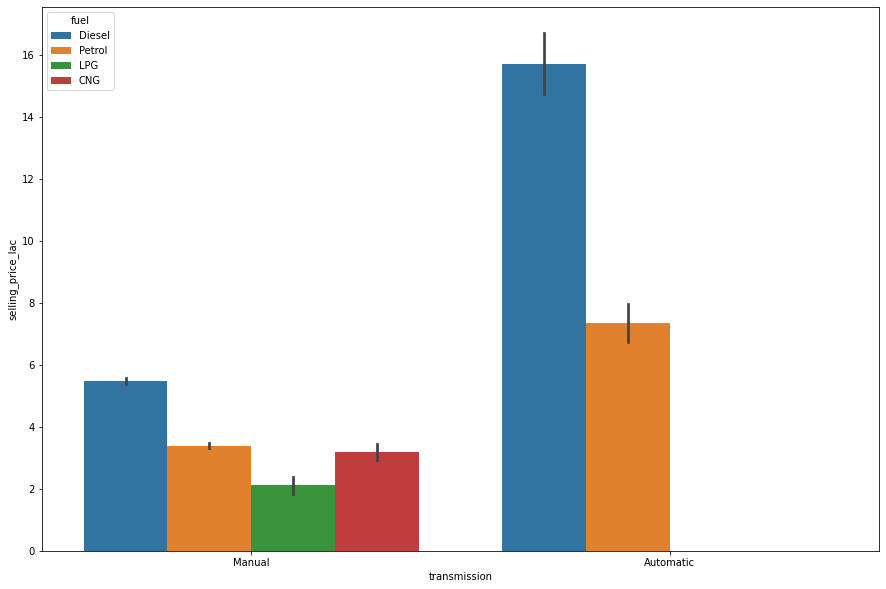

In [93]:
plt.figure(figsize = (15,10))

sns.barplot(x=df['transmission'],y=df['selling_price_lac'], hue=df['fuel'])
plt.show()

* There are not Automatic cars with LPG and CNG fuel.
* Diesel Automatic cars has very high selling price

###### *visualizing **selling_price_lac** and  **owner** column*

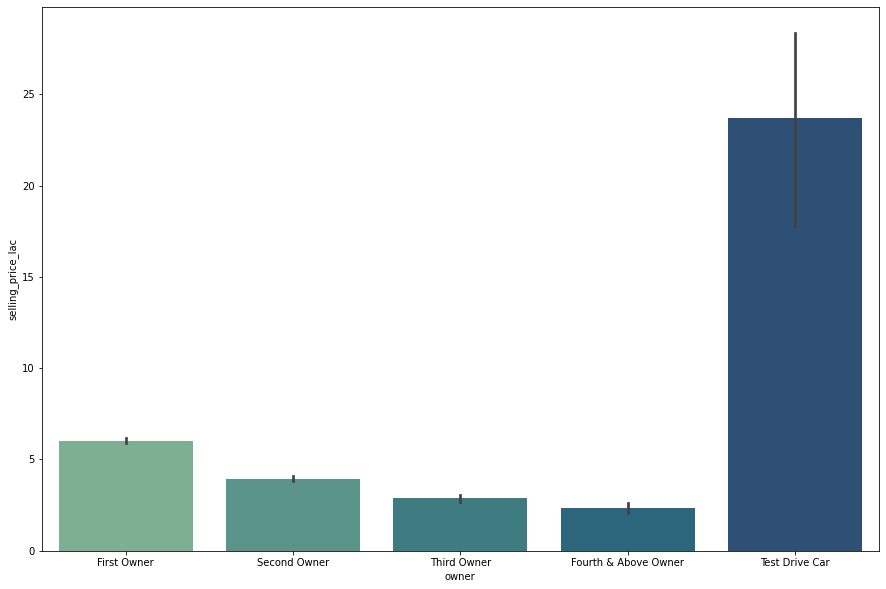

In [94]:
plt.figure(figsize = (15,10))

sns.barplot(x=df['owner'],y=df['selling_price_lac'],palette="crest")
plt.show()

* cars with less owner has high selling price
* test drive car has very high selling price

### **Step 4:** Feature Engineering/EDA


>
* In this step we will Deal with Categorical Cols and convert them to numerical by creating dummies.
* we can use one-hot encoder or label encoder
* we will study correlation among column

####**Step 4.1:** Dealing with Categorical Variables

In [95]:
# Dealing With Categorical Variables, creagting dummies i.e one hot encoding
data= pd.get_dummies(df,drop_first=True)

data.head()

,mileage,engine,max_power,seats,km_driven_lac,car_age,selling_price_lac,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,23.40,1248.0,74.00,5.0,1.455,8,4.50,1,0,0,1,0,1,0,0,0,0
1,21.14,1498.0,103.52,5.0,1.200,8,3.70,1,0,0,1,0,1,0,1,0,0
2,17.70,1497.0,78.00,5.0,1.400,16,1.58,0,0,1,1,0,1,0,0,0,1
3,23.00,1396.0,90.00,5.0,1.270,12,2.25,1,0,0,1,0,1,0,0,0,0
4,16.10,1298.0,88.20,5.0,1.200,15,1.30,0,0,1,1,0,1,0,0,0,0


Label Encoding..
Dealing with Categorical Columns.

* this we won't use as it may affect accuracy because of some columns like fuel

In [96]:
#Label Encoding - Converting Object to Int64

#from sklearn.preprocessing import LabelEncoder

In [97]:
#objects cols
#obj_cols=["fuel","seller_type","transmission","owner"]

#encoding cols
#for i in obj_cols:
#   le=LabelEncoder()
#    df[i] = le.fit_transform(df[i])

####**Step 4.2:** Correlation Analysis

In [98]:
correlation=data.corr()
print(correlation["selling_price_lac"].sort_values(ascending= False),"\n")

selling_price_lac               1.000000
max_power                       0.720450
engine                          0.497110
fuel_Diesel                     0.306079
seats                           0.227394
owner_Test Drive Car            0.121118
seller_type_Trustmark Dealer    0.031082
fuel_LPG                       -0.052283
owner_Fourth & Above Owner     -0.102085
mileage                        -0.131945
owner_Third Owner              -0.151660
owner_Second Owner             -0.177437
km_driven_lac                  -0.213241
seller_type_Individual         -0.269420
fuel_Petrol                    -0.292122
transmission_Manual            -0.475392
car_age                        -0.496483
Name: selling_price_lac, dtype: float64 



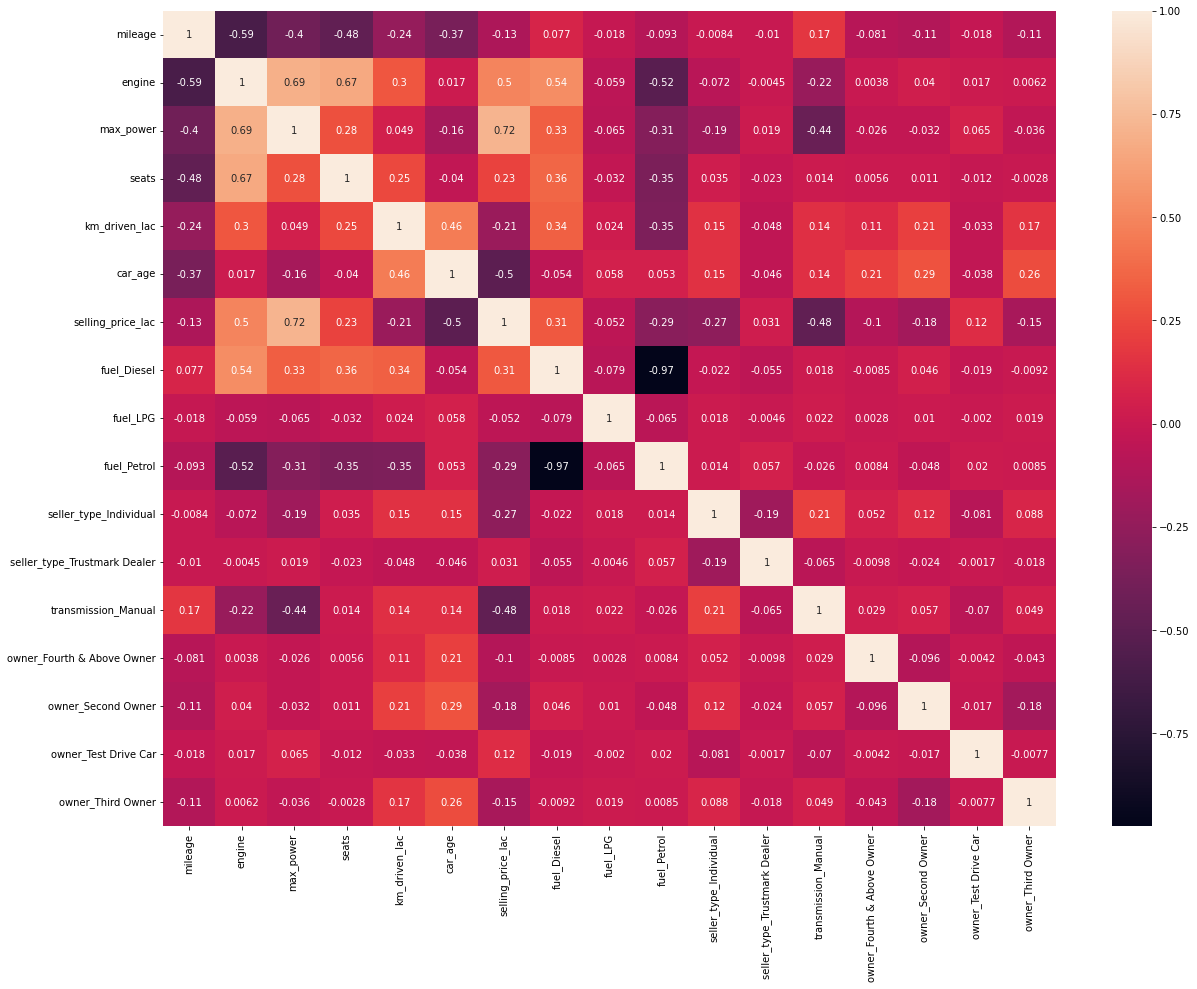

In [99]:

plt.figure(figsize=[20,15])
sns.heatmap(data.corr(), annot=True)
plt.show()

####**Step 4.3:**Checking Multicollinearity Using VIF

In [100]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data[['selling_price_lac','mileage', 'engine', 'max_power', 'seats', 'km_driven_lac', 'car_age',
        'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Manual', 'owner_Fourth & Above Owner',
       'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,8.914648,selling_price_lac
1,35.181958,mileage
2,50.838969,engine
3,29.830750,max_power
4,62.805918,seats
5,5.597934,km_driven_lac
6,11.350811,car_age
7,58.582601,fuel_Diesel
8,1.456892,fuel_LPG
9,39.399108,fuel_Petrol


* Ooo, there are columns with VIF factor greater than 10. 🥲..
* In general, a VIF above 10 indicates high correlation and is cause for concern.
* we will drop few columns and check again for VIF.

In [101]:
data2=data.drop("seats",axis=1)

In [102]:
data2.drop("fuel_Diesel", axis=1,inplace=True)

In [103]:
data2.drop("max_power", axis=1,inplace=True)

In [104]:
#data2.drop("engine", axis=1,inplace=True)

In [105]:
data2.drop("mileage", axis=1,inplace=True)

In [106]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data2[[ 'engine','km_driven_lac', 'car_age',
         'fuel_LPG', 'fuel_Petrol'
        ,'seller_type_Individual','seller_type_Trustmark Dealer',
        'owner_Fourth & Above Owner','transmission_Manual' ,
       'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns
vif

,VIF,Features
0,6.892086,engine
1,5.363147,km_driven_lac
2,9.002599,car_age
3,1.021681,fuel_LPG
4,2.214305,fuel_Petrol
5,9.505224,seller_type_Individual
6,1.037420,seller_type_Trustmark Dealer
7,1.125820,owner_Fourth & Above Owner
8,9.223621,transmission_Manual
9,1.743920,owner_Second Owner


* This Looks better as all VIF are less than 10

* If model building is done on "data" Without performing VIF and without removing column with high VIF, the accuracy of model on training and testing data is greater than 0.90 *(Checked/Verified)* using both Regression and hyperparameter tunning, but this is not good as column with high VIF are present and will influence the model and result.

###**Step 5 :** Model Building and Model Development

##### Distribution of **"selling_price_lac"** Column

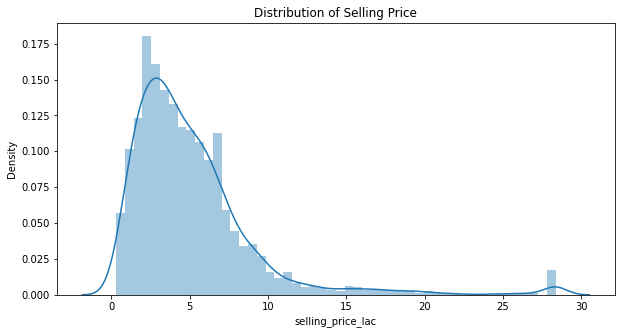

In [107]:
plt.figure(figsize=[10,5])
sns.distplot((data['selling_price_lac']))
plt.title('Distribution of Selling Price')
plt.show()

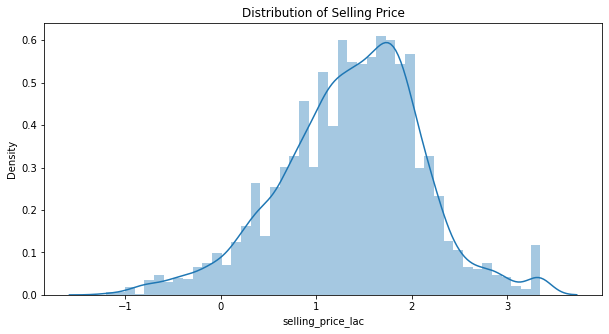

In [108]:
#log distribution
plt.figure(figsize=[10,5])
sns.distplot(np.log(data['selling_price_lac']))
plt.title('Distribution of Selling Price')
plt.show()

#####*Declaring dependent and independent variable*

In [109]:
X = data2.drop(["selling_price_lac"], axis=1)  #feature variable
y = np.log(data2["selling_price_lac"])   #target variable

In [110]:
# feature scallng on training data
#from sklearn import preprocessing 
#X = preprocessing.StandardScaler().fit(X).transform(X)
#X=pd.DataFrame(X)
#X.head()
#scaler.fit(X[['mileage', 'engine', 'max_power','car_age']] )

In [111]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

#####*Splitting into training and testing data set*

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 40)

In [113]:
#X_train.head()

In [114]:
#shape of training and testing test

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4677, 12)
(2005, 12)
(4677,)
(2005,)


####**✨MODEL BUILDING✨**

####**5.1 LINEAR REGRESSION**

In [115]:
#importing libraries for Linear regression
from sklearn.linear_model import LinearRegression

#libraries for matrices
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error

In [116]:
#Model Building
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Training Model 
lr.fit(X_train,y_train)

# Model Summary..checking acc of model on training set
y_pred_lr = lr.predict(X_train)

In [117]:
print(lr.score(X_train, y_train))

0.7866857935329556


In [118]:
#summary of our regression model
print('-'*30,"\n")
print(f'Model: {str(lr)}')
print(f'RMSE:  {mean_squared_error(y_train,y_pred_lr)}')
print(f'MAE:   {mean_absolute_error(y_train, y_pred_lr)}')
print(f'R2:    {r2_score(y_train, y_pred_lr)}')
print('-'*30)

------------------------------ 

Model: LinearRegression()
RMSE:  0.11628172309251379
MAE:   0.2665780260042531
R2:    0.7866857935329556
------------------------------


######*EVALUATION OF THE MODEL*

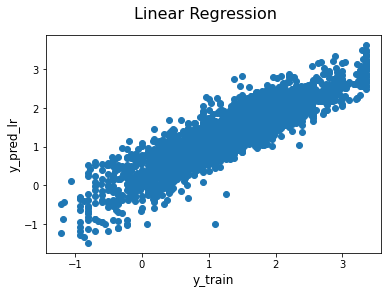

In [119]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_train,y_pred_lr)

#title
fig.suptitle("Linear Regression ", fontsize=16)              # Plot heading 

#axis label
plt.xlabel('y_train', fontsize=12)                          # X-label
plt.ylabel('y_pred_lr', fontsize=12)
plt.show()

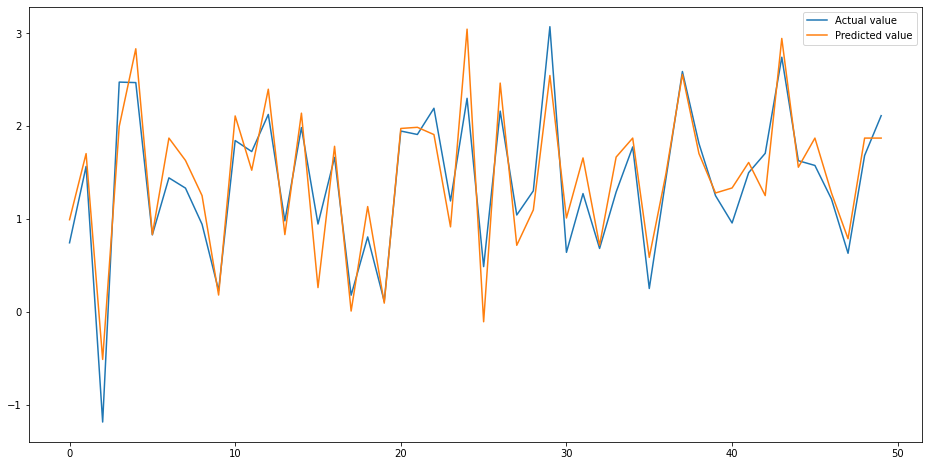

In [120]:
test = pd.DataFrame({'Predicted value':y_pred_lr, 'Actual value':y_train})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual value','Predicted value'])

######**Finding the weights and bias**

In [121]:
#Obtain the bias (intercept) of the regression
lr.intercept_

1.376876356237918

In [122]:
# Obtain the weights (coefficients) of the regression
lr.coef_

array([ 0.30729095, -0.04328323, -0.46818493, -0.00636352, -0.09068125,
       -0.03986966,  0.00247708, -0.10389885, -0.01633726, -0.02888784,
        0.01292543, -0.02327382])

#####**Assumptions of Linear Regression**

######**1. Linearity**


* this involves checking the relation between independent and dependent column/variable
* this relationship need to be Linear
* This is usually checked before model building

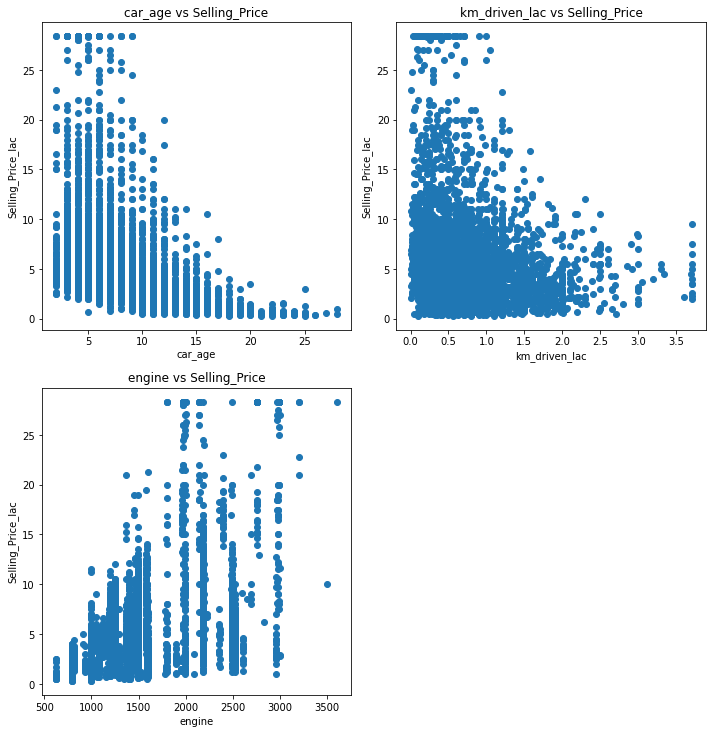

In [123]:
def scatter(x,fig):
    plt.subplot(4,2,fig)
    plt.scatter(data2[x],data2['selling_price_lac'])
    plt.title(x+' vs Selling_Price')
    plt.ylabel('Selling_Price_lac')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('car_age', 1)
scatter('km_driven_lac', 2)
scatter('engine', 3)

plt.tight_layout()

######**2. mean of residuals**

* residual are the diff between the trained and predicted values
*mean of the residuals should be zero or close to zero for the good accuracy of the model

In [124]:
#calculating residuals
residuals = y_train.values-y_pred_lr

#mean of residual
mean_residuals = np.mean(residuals)

print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 1.680645502319031e-17


In [125]:
#plt.scatter((X_train)[0],pd.DataFrame('residuals'))

* Close to Zero, Good for the model

######**3.Check for Homoscedasticity**


* Homoscedasticity means that the residuals have equal or almost equal variance across the regression line.

* By plotting the error terms with predictedterms we can check that there should not be any pattern in the error terms.

* If there is a definite pattern (like linear or quadratic or funnel shaped) obtained from the scatter plot then heteroscedasticity is present.

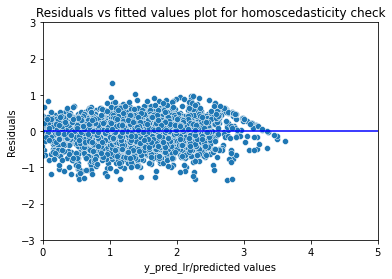

In [126]:
#scatter plot to check
sns.scatterplot(y_pred_lr,residuals)

#labelling axis
plt.xlabel('y_pred_lr/predicted values')
plt.ylabel('Residuals')

#range for x and y axis
plt.ylim(-3,3)
plt.xlim(0,5)

#lineplot
sns.lineplot([0,5],[0,0],color='blue')

#title for plot
plt.title('Residuals vs fitted values plot for homoscedasticity check')
plt.show()

**Goldfeld Quandt Test**

* Checking heteroscedasticity : Using Goldfeld Quandt we test for heteroscedasticity.

* **Null Hypothesis**: Error terms are homoscedastic

* **Alternative Hypothesis**: Error terms are heteroscedastic.

In [127]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic', 'p-value']

test = sms.het_goldfeldquandt(residuals, X_train)

lzip(name, test)

[('F statistic', 1.0338385368886853), ('p-value', 0.2111387864851249)]

* Since **p value is more than 0.05** in Goldfeld Quandt Test, we **can't reject** it's null hypothesis that error terms are homoscedastic. 
* This is Good for model

######**4. Check for Normality of error terms/residuals**

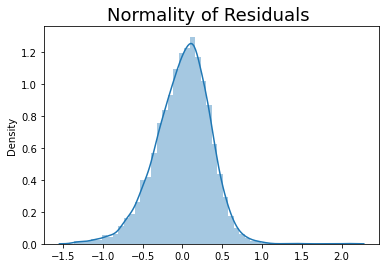

In [128]:
sns.distplot(residuals,kde=True)
plt.title("Normality of Residuals ", size=18)
plt.show()

#it is normal, so good for model

######**5. No autocorrelation of residuals**

* There should not be autocorrelation in the data so the error terms should not form any pattern.

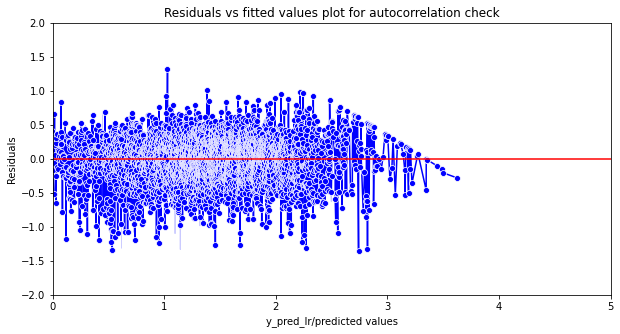

In [129]:
plt.figure(figsize=(10,5))

#lineplot
sns.lineplot(y_pred_lr,residuals,marker='o',color='blue')

#labelling axis and range for axis
plt.xlabel('y_pred_lr/predicted values')
plt.ylabel('Residuals')
plt.ylim(-2,2)
plt.xlim(0,5)

sns.lineplot([0,5],[0,0],color='red')

#title
plt.title('Residuals vs fitted values plot for autocorrelation check')

plt.show()

* **Checking for autocorrelation** 
To ensure the absence of autocorrelation we use Ljungbox test.

**Null Hypothesis:** Autocorrelation is absent.
**Alternative Hypothesis:** Autocorrelation is present.

In [130]:
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(residuals , lags = 40)[1])

0.11103775633378131

* since *p-value is greater than 0.05*, we **fail to reject** the Null Hypothesis.
* this implies no auto correlation is present.

######**6. No perfect multicollinearity**

* multicollinearity refers to the extent to which independent variables are correlated
* Multicollinearity affects the coefficients and p-values, but it does not influence the predictions, precision of the predictions, and the goodness-of-fit statistics.

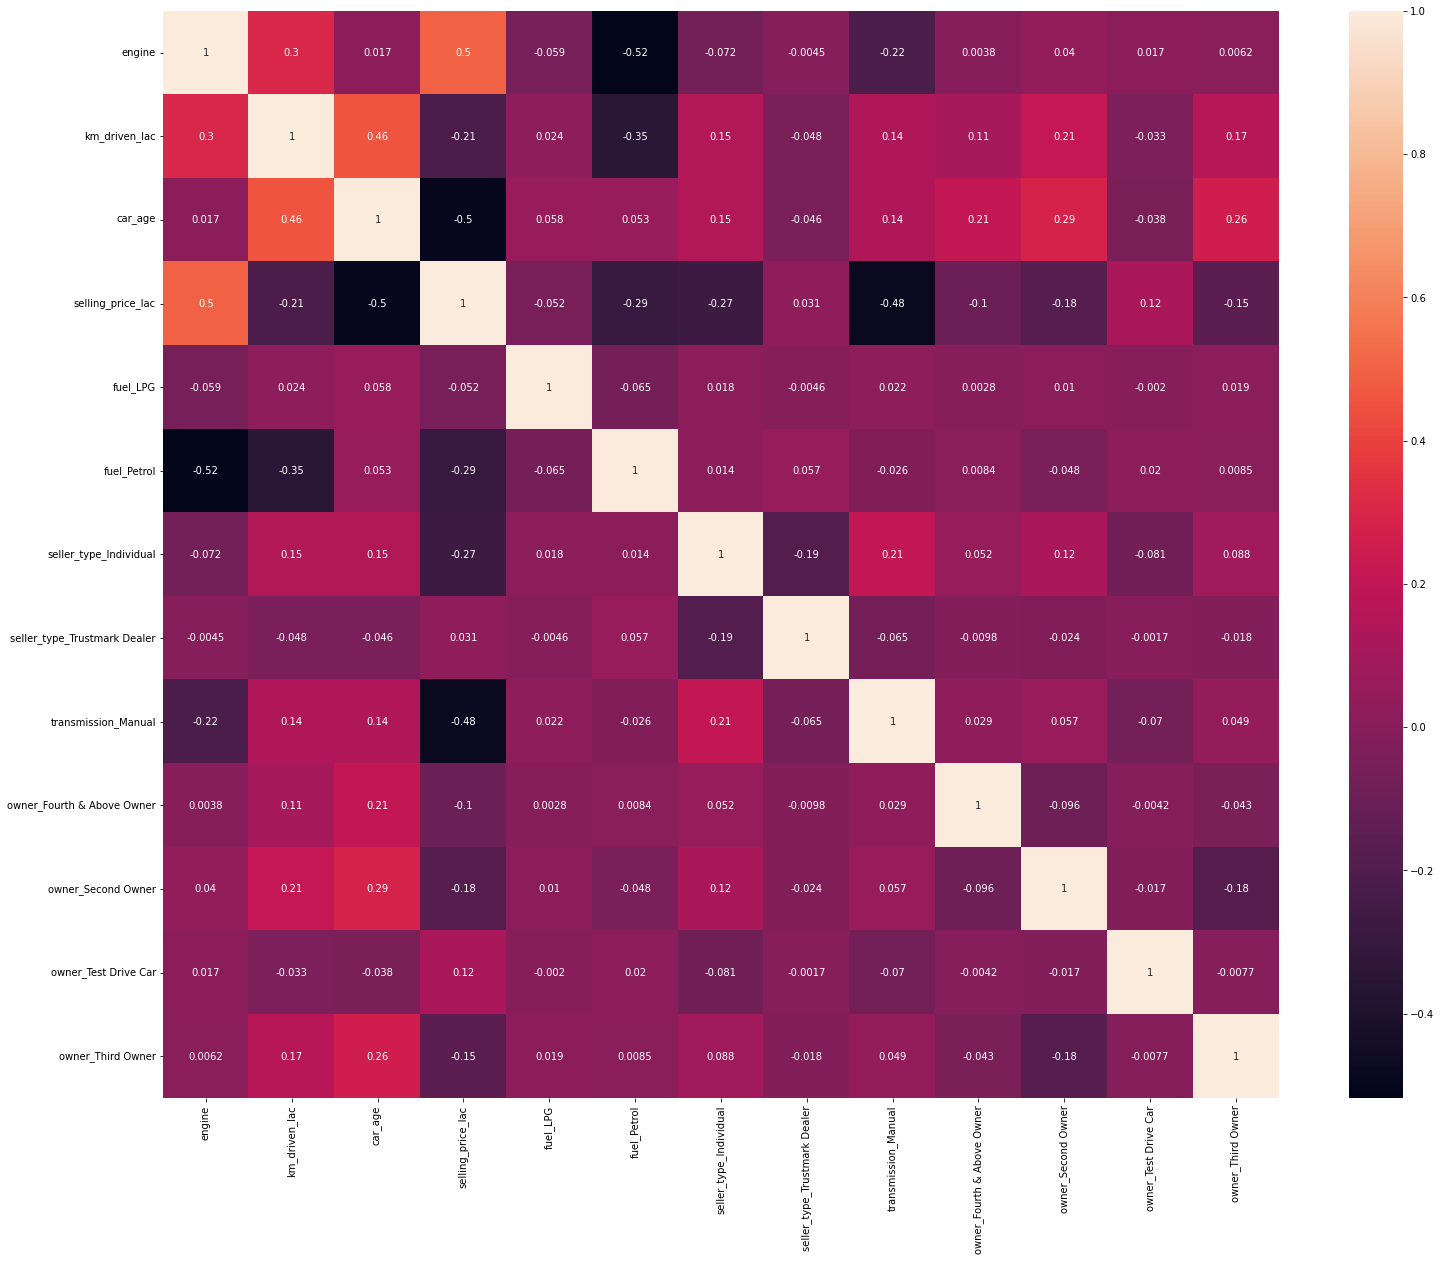

In [131]:
plt.figure(figsize=[25,20])
sns.heatmap(data2.corr(), annot=True)
plt.show()

####**5.2 RANDOM FOREST REGRESSOR**

In [132]:
#importing libraries
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

# Training Model
rf.fit(X_train,y_train)

# Model Summary
y_pred_rf = rf.predict(X_train)

In [133]:
print(rf.score(X_train, y_train))

0.9691392372405101


In [134]:
#summary of our Random Forest regression model
print('-'*30,"\n")
print(f'Model: {str(rf)}')
print(f'RMSE:  {mean_squared_error(y_train,y_pred_rf)}')
print(f'MAE:   {mean_absolute_error(y_train, y_pred_rf)}')
print(f'R2:    {r2_score(y_train, y_pred_rf)}')
print('-'*30)

------------------------------ 

Model: RandomForestRegressor()
RMSE:  0.016822802048944503
MAE:   0.09301073552483392
R2:    0.9691392372405101
------------------------------


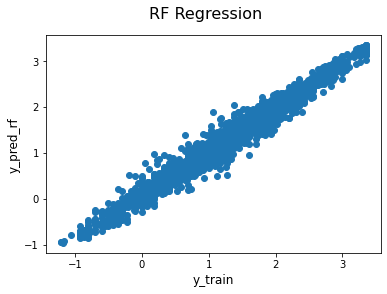

In [135]:
# Plotting y_train and y_pred_rf to understand the spread.
fig = plt.figure()
plt.scatter(y_train,y_pred_rf)

#title
fig.suptitle("RF Regression ", fontsize=16)              # Plot heading 

#axis label
plt.xlabel('y_train', fontsize=12)                          # X-label
plt.ylabel('y_pred_rf', fontsize=12)
plt.show()

####**5.3 KNN Regression**

In [136]:
from sklearn.neighbors import KNeighborsRegressor

#initializing
knn= KNeighborsRegressor()

#fitting
knn.fit(X_train, y_train)

#prediciting on train set
y_pred_knn = knn.predict(X_train)

In [137]:
print(knn.score(X_train, y_train))

0.8682532900187521


In [138]:
#summary of our KNN regression model
print('-'*30,"\n")
print(f'Model: {str(knn)}')
print(f'RMSE:  {mean_squared_error(y_train,y_pred_knn)}')
print(f'MAE:   {mean_absolute_error(y_train, y_pred_knn)}')
print(f'R2:    {r2_score(y_train, y_pred_knn)}')
print('-'*30)

------------------------------ 

Model: KNeighborsRegressor()
RMSE:  0.0718176941991718
MAE:   0.20323788664876472
R2:    0.8682532900187521
------------------------------


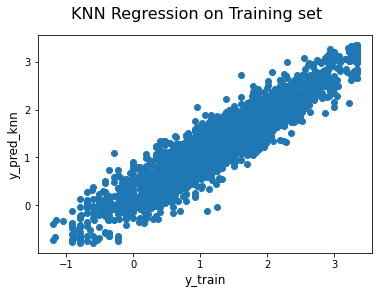

In [139]:
# Plotting y_train and y_pred_knn to understand the spread.
fig = plt.figure()
plt.scatter(y_train,y_pred_knn)

#title
fig.suptitle("KNN Regression on Training set ", fontsize=16)              # Plot heading 

#axis label
plt.xlabel('y_train', fontsize=12)                          # X-label
plt.ylabel('y_pred_knn', fontsize=12)
plt.show()

###**TESTING OF MODEL ON TEST DATA AND CHECKING ACCURACY**

**Testing Model Accuracy on Test Data**
------------------------------ 

Model: RandomForestRegressor()
RMSE:  0.08487191292886032
MAE:   0.21437422012245985
R2:    0.8455691836203537
------------------------------
------------------------------ 

Model: LinearRegression()
RMSE:  0.12465056811368679
MAE:   0.27268099241282
R2:    0.7731889345758164
------------------------------
------------------------------ 

Model: KNeighborsRegressor()
RMSE:  0.11128249771796425
MAE:   0.25030637805332445
R2:    0.7975131421185688
------------------------------


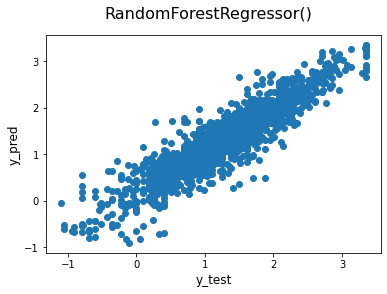

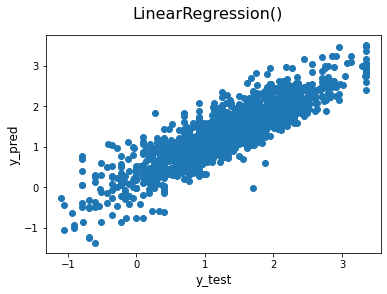

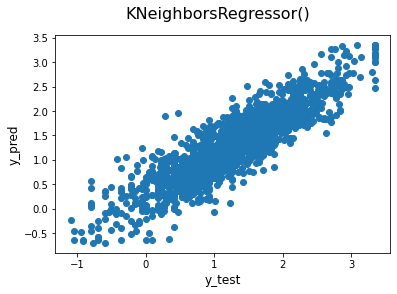

In [140]:
models = [RandomForestRegressor(), LinearRegression(),KNeighborsRegressor()]
scores = dict()

print("**Testing Model Accuracy on Test Data**")
for m in models:
    #training  model
    m.fit(X_train, y_train)
     
    #model summary
    y_pred = m.predict(X_test)

    print('-'*30,"\n")
    print(f'Model: {str(m)}')
    print(f'RMSE:  {mean_squared_error(y_test,y_pred)}')
    print(f'MAE:   {mean_absolute_error(y_test, y_pred)}')
    print(f'R2:    {r2_score(y_test, y_pred)}')
    print('-'*30)


    #EVALUATION OF THE MODEL
    # Plotting y_test and y_pred to understand the spread.
    fig = plt.figure()
    plt.scatter(y_test,y_pred)
    fig.suptitle(m, fontsize=16)              # Plot heading 
    plt.xlabel('y_test', fontsize=12)                          # X-label
    plt.ylabel('y_pred', fontsize=12)

In [141]:
predict_rf=rf.predict(X_test)
score1=r2_score(y_test, predict_rf)
print("RF score on Test Data",score1)

RF score on Test Data 0.8462493589757323


In [142]:
predict_lr=lr.predict(X_test)
score2=r2_score(y_test, predict_lr)
print("LR score on Test Data",score2)

LR score on Test Data 0.7731889345758164


In [143]:
predict_knn=knn.predict(X_test)
score3=r2_score(y_test, predict_knn)
print("KNN score on Test Data",score3)

KNN score on Test Data 0.7975131421185688


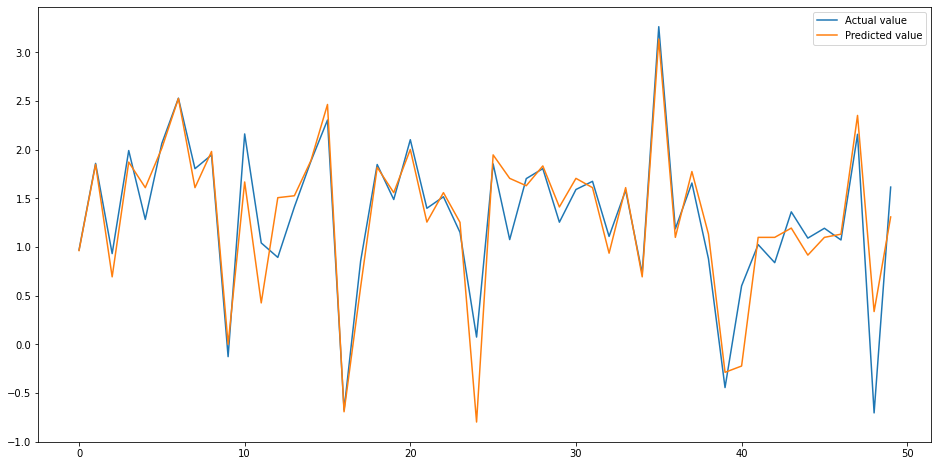

In [144]:
test = pd.DataFrame({'Predicted value':predict_rf, 'Actual value':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual value','Predicted value'])

**Inferences**
* Accuracy of Random Forest Regressor is good on both train data set and testing data set
* Now Perform Hyperparameter Optimization to get the best parameters for Random Forest Regression.

###**HYPERPARAMETER TUNNING**

######**Hyperparameter optimization using RandomizedSearchCV**

In [145]:
#Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV

In [146]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [147]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap':bootstrap}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10], 'bootstrap': [True, False]}


In [148]:
# Random search of parameters, using 5 fold cross validation, 

# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 20, cv = 5, verbose=2)

In [149]:
rf_random.fit(X_test,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=800; total time=   1.8s
[CV] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=800; total time=   1.8s
[CV] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=800; total time=   1.7s
[CV] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=800; total time=   1.7s
[CV] END bootstrap=True, max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=800; total time=   1.8s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1200; total time=   4.6s
[CV] END bootstrap=True, max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimato

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   verbose=2)

In [150]:
rf_random.best_params_

{'n_estimators': 1100,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': True}

**performing RF regressor using best parameters**

In [151]:
randmf = RandomForestRegressor(n_estimators = 1200, min_samples_split = 2, min_samples_leaf= 1, max_features = 'auto', max_depth= 20, bootstrap=True) 
randmf.fit( X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=1200)

In [152]:
predictions=randmf.predict(X_train)

In [153]:
print(randmf.score(X_train, y_train))

0.9694761527169223


In [154]:
#summary of our RF_Hyperparameter_RSCV model
print('-'*30,"\n")
print(f'Model: {str(rf)}')
print(f'RMSE:  {mean_squared_error(y_train,predictions)}')
print(f'MAE:   {mean_absolute_error(y_train, predictions)}')
print(f'R2:    {r2_score(y_train, predictions)}')
print('-'*30)

------------------------------ 

Model: RandomForestRegressor()
RMSE:  0.016639142869452363
MAE:   0.09302617718810308
R2:    0.9694761527169223
------------------------------


**Testing accuracy using Hyperparameter on Testing model**

In [155]:
test_pred=randmf.predict(X_test)

In [156]:
print(randmf.score(X_test, y_test))

0.8486029570557754


In [157]:
#summary of our RF_Hyperparameter_RSCV on Testing model
print('-'*30,"\n")
print(f'Model: {str(rf)}')
print(f'RMSE:  {mean_squared_error(y_test,test_pred)}')
print(f'MAE:   {mean_absolute_error(y_test, test_pred)}')
print(f'R2:    {r2_score(y_test, test_pred)}')
print('-'*30)

------------------------------ 

Model: RandomForestRegressor()
RMSE:  0.08320461516476632
MAE:   0.21227963370344533
R2:    0.8486029570557754
------------------------------


######**HyperParameter Optimization using GridSearch CV**

In [158]:
from sklearn.model_selection import GridSearchCV

NOTE- Here less parameter are given because higher the parameter the more time it will take..so here I'm just showing how this method works.(**DEMO**)

In [159]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 600, num = 3)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 30, num = 3)]
# max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [ 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]

In [160]:
# Create the grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(param_grid)

{'n_estimators': [200, 400, 600], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30], 'min_samples_split': [5, 10], 'min_samples_leaf': [1, 2]}


In [161]:
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [162]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 72 candidates, totalling 216 fits


{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 400}

In [163]:
grid_rf = RandomForestRegressor(n_estimators = 600, min_samples_split = 10, min_samples_leaf= 1, max_features = 'auto', max_depth= 10) 
grid_rf.fit( X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=600)

In [164]:
test_pred_grid=grid_rf.predict(X_test)

In [165]:
grid_accuracy=grid_rf.score(X_test, y_test)
grid_accuracy

0.8582954355932317

###**Model Summary:**

In [166]:
pd.DataFrame(data={'Model': ['Linear Regression', 'K-Nearest Neighbor','Random Forest Regression', 'RF_RandomSearchCV','RF_GridSearchCV'], 'Accuracy %': [score2*100, score3*100, score1*100, r2_score(y_test, test_pred)*100, grid_accuracy*100]})

,Model,Accuracy %
0,Linear Regression,77.318893
1,K-Nearest Neighbor,79.751314
2,Random Forest Regression,84.624936
3,RF_RandomSearchCV,84.860296
4,RF_GridSearchCV,85.829544


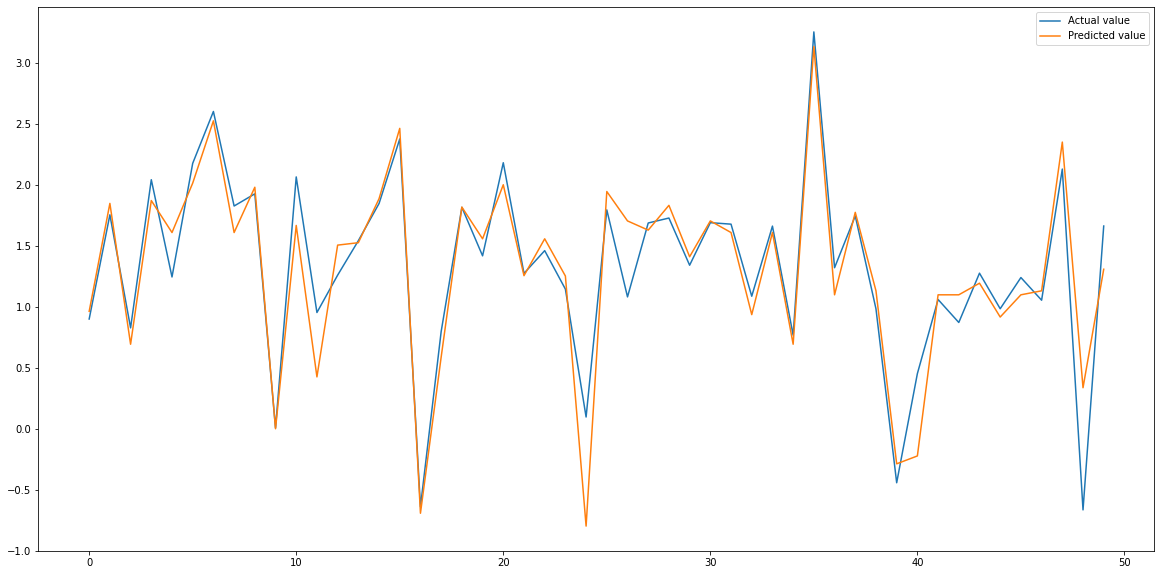

In [167]:
#graph of GridSearchCV result

test = pd.DataFrame({'Predicted value':test_pred_grid, 'Actual value':y_test})
fig= plt.figure(figsize=(20,10))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual value','Predicted value'])

* RandomForestRegressor is the best for the accuracy of the model
* Accuracy is increased by selecting best parameter by performing Hyperparameter Optimization using RandomizedSearchCV and GridSearchCV.